In [25]:
# Source : https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/

In [ ]:
from matplotlib import pyplot
from pandas import DataFrame

from sklearn.datasets import make_circles

from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout

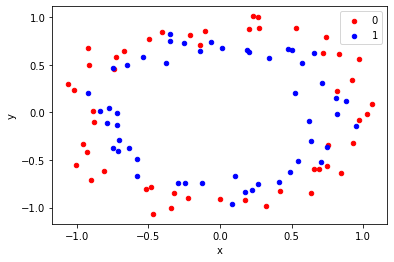

In [ ]:
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [ ]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [ ]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [ ]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 37ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.5166 - val_accuracy: 0.7857
Epoch 2/200
1/1 [==============================] - 0s 50ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.5171 - val_accuracy: 0.7857
Epoch 3/200
1/1 [==============================] - 0s 33ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.5176 - val_accuracy: 0.7857
Epoch 4/200
1/1 [==============================] - 0s 34ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.5181 - val_accuracy: 0.7857
Epoch 5/200
1/1 [==============================] - 0s 35ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.5186 - val_accuracy: 0.7857
Epoch 6/200
1/1 [==============================] - 0s 37ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.5191 - val_accuracy: 0.7857
Epoch 7/200
1/1 [==============================] - 0s 61ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.5196 - val_accuracy: 0.7857
Epoch 8/200
1/1 [===

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.786


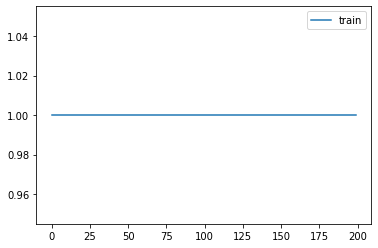

In [ ]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

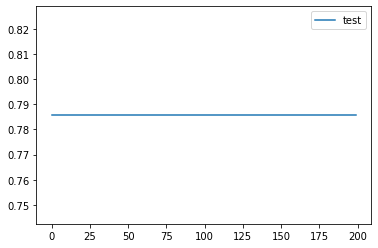

In [ ]:
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## ANN with Dropout

In [ ]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.967, Test: 0.800


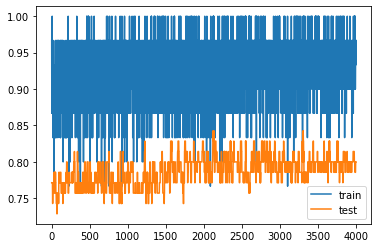

In [ ]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()